CARICO DI CONDUZIONE DEL CONNETTORE IN RAME CHE CONNETTE 2 STADIO DEL PULSE TUBE CON PIATTO 4K

- INTEGRALE RAME

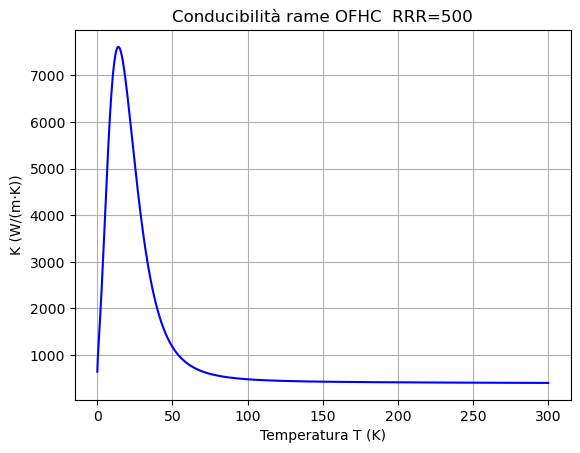

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = 2.8075
b = -0.54074
c = -1.2777
d = 0.15362
e = 0.36444
f = -0.02105
g = -0.051727
h = 0.0012226
i = 0.0030964

# Funzione conducibilità vs Temperatura
def conductivity(T):
    if T <= 0:
        return np.nan  # Evita logaritmi di valori non validi
    return 10**( (a + c * T**0.5 + e * T + g * T**1.5 + i * T**2) / (1 + b * T**0.5 + d * T + f * T**1.5 + h * T**2) )

 # Funzione per l'integrazione
def integrand(T):
    return conductivity(T)

    
#--------INTEGRALE DI CONDUCIBILITà----------------
# Intervallo di temperatura
T_range = np.linspace(0.0000001, 300, 1000) # estensione della curva anche fuori dal dominio del NIST (4-300)

# Valori di y calcolati
y_values = conductivity(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità rame OFHC  RRR=500')
plt.xlabel('Temperatura T (K)')
plt.ylabel('K (W/(m·K))')
plt.grid(True)
plt.show()
#plt.savefig("Carico_conduzione_g10_nist.png")



- PLOT 3D ( x=T1, y=T2, z=Q ) con A/l fissato

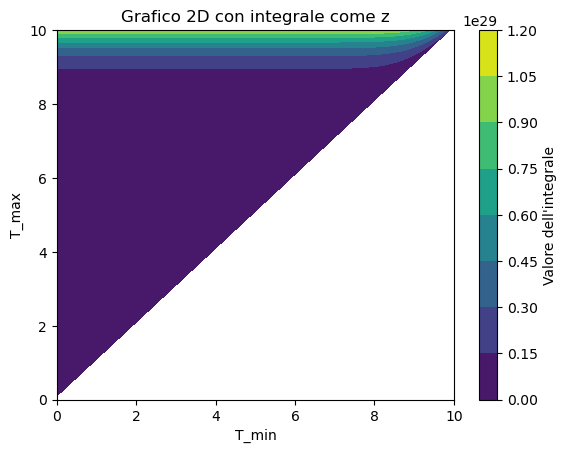

In [23]:

# Calcola l'integrale tra gli estremi x e y
def compute_integral(x, y):
    result, _ = quad(integrand, x, y)
    return result

# Parametro geometrico
A = 1
l = 1


# Genera dati per x e y
x_vals = np.linspace(0, 10, 100) #vals sta per valori
y_vals = np.linspace(0, 10, 100)

# Prepara una matrice per i risultati di z
z_vals = np.zeros((len(x_vals), len(y_vals)))

# Calcola z per ogni coppia di estremi x e y    
for n, x in enumerate(x_vals):
    for m, y in enumerate(y_vals):
        if x < y:  # Solo se x è minore di y
            z_vals[n, m] = A/l*compute_integral(x, y)
        else:
            z_vals[n, m] = np.nan  # Evita integrali con x > y

# Crea un grafico 2D (scatter) in cui z è il colore
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z_vals.T, cmap='viridis')  # Usa contourf per mappa di densità

# Aggiungi una colorbar che rappresenta i valori di z
plt.colorbar(label='Valore dell\'integrale')

# Etichette e titolo
plt.xlabel('T_min')
plt.ylabel('T_max')
plt.title('Grafico 2D con integrale come z')

# Mostra il grafico
plt.show()
